In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## captures (maybe implement forced recapturing), check if top move of SF is >>> second best move
## WDL from Leela (maybe compare to actual game result, could be interesting)
## move number (use FEN, string split)
## Totally winning/losing moves
## Castling rights (using FEN)
## Stockfish static eval
## https://github.com/marisvs/StaticEval/blob/master/code/CreateStaticEvalGraphs.py

In [3]:
import csv
with open ('sample_evaluation_set.csv', newline = '') as game_data_csv:
    game_data = csv.reader(game_data_csv, delimiter=',')
    counter = 0
    for row in game_data:
        if counter > 1:
            break
        print(row)
        counter += 1

['game_id', 'type', 'result', 'white_player', 'black_player', 'white_elo', 'black_elo', 'time_control', 'num_ply', 'termination', 'white_won', 'black_won', 'no_winner', 'move_ply', 'move', 'cp', 'cp_rel', 'cp_loss', 'is_blunder_cp', 'winrate', 'winrate_elo', 'winrate_loss', 'is_blunder_wr', 'opp_winrate', 'white_active', 'active_elo', 'opponent_elo', 'active_won', 'is_capture', 'clock', 'opp_clock', 'clock_percent', 'opp_clock_percent', 'low_time', 'board', 'active_bishop_count', 'active_knight_count', 'active_pawn_count', 'active_queen_count', 'active_rook_count', 'is_check', 'num_legal_moves', 'opp_bishop_count', 'opp_knight_count', 'opp_pawn_count', 'opp_queen_count', 'opp_rook_count']
['hYAIFMod', 'Rapid', '0-1', 'Thiron31', 'Socialengineery', '995', '1019', '600+0', '74', 'Normal', 'False', 'True', 'False', '44', 'b5d4', '-1.2', '-1.2', '-0.03', 'False', '0.4372', '0.3979', '-0.0058', 'False', '0.6382', 'True', '995', '1019', 'False', 'True', '450.0', '403.0', '0.25', '0.328', 'Fa

In [4]:
with open ('sample_evaluation_set.csv', newline = '') as game_data_csv:
    game_data = csv.reader(game_data_csv, delimiter=',')
    row_count = sum(1 for row in game_data)
    print(row_count)
    
# So the number of rows of data we have is 100000

1296623


In [5]:
maia_dataframe = pd.read_csv("sample_evaluation_set.csv", header=None)
maia_dataframe.columns = maia_dataframe.iloc[0]
maia_dataframe.drop(axis = 0, labels =  0, inplace = True, errors = 'raise')

/Users/matthewho/Downloads/ENTER/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,8,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
maia_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296622 entries, 1 to 1296622
Data columns (total 47 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   game_id              1296622 non-null  object
 1   type                 1296622 non-null  object
 2   result               1296622 non-null  object
 3   white_player         1296622 non-null  object
 4   black_player         1296622 non-null  object
 5   white_elo            1296622 non-null  object
 6   black_elo            1296622 non-null  object
 7   time_control         1296622 non-null  object
 8   num_ply              1296622 non-null  object
 9   termination          1296622 non-null  object
 10  white_won            1296622 non-null  object
 11  black_won            1296622 non-null  object
 12  no_winner            1296622 non-null  object
 13  move_ply             1296622 non-null  object
 14  move                 1296622 non-null  object
 15  cp             

In [7]:
df = maia_dataframe
df['white_elo'] = df['white_elo'].astype(int)
df['black_elo'] = df['black_elo'].astype(int)
# maybe graph move number using the fen

[[<AxesSubplot:title={'center':'white_elo'}>]]
[[<AxesSubplot:title={'center':'black_elo'}>]]


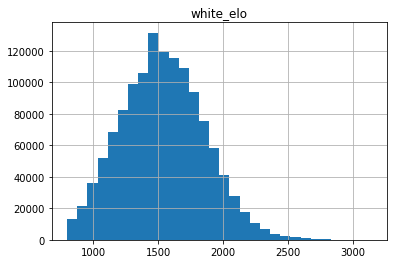

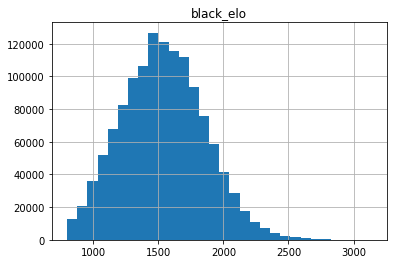

In [8]:
print(df.hist(column = 'white_elo', bins = 30))
print(df.hist(column = 'black_elo', bins = 30))

In [9]:
df['elo_diff'] = abs(df['white_elo'] - df['black_elo'])

[[<AxesSubplot:title={'center':'elo_diff'}>]]


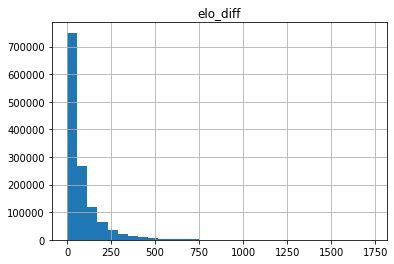

In [10]:
print(df.hist(column = 'elo_diff', bins = 30))

[[<AxesSubplot:title={'center':'num_legal_moves'}>]]


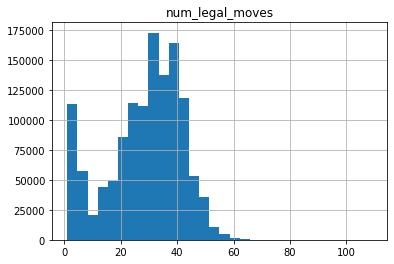

In [11]:
df['num_legal_moves'] = pd.to_numeric(df['num_legal_moves'])
print(df.hist(column = 'num_legal_moves', bins = 30))

In [12]:
df['board'][2]

'8/6b1/3pq1k1/2p3pp/1p1p1p2/1P1PrP1P/P5P1/2Q1RBK1 w - - 2 38'

In [13]:
def fen_piece_count(fen):
    piece_count = [0] * 12
    piece_types_str = 'PRNBQKprnbqk'
    for char in fen:
        if char == ' ':
            break
        if piece_types_str.find(char) >= 0:
            piece_count[piece_types_str.find(char)] += 1
    return piece_count

def find_white_piece_vals(fen):
    total_piece_count = fen_piece_count(fen)
    piece_vals = [1, 5, 3, 3, 9]
    white_piece_vals = sum(total_piece_count[i] * piece_vals[i] for i in range(5))
    return white_piece_vals

def find_black_piece_vals(fen):
    total_piece_count = fen_piece_count(fen)
    piece_vals = [1, 5, 3, 3, 9]
    black_piece_vals = sum(total_piece_count[i] * piece_vals[i - 6] for i in range(6, 11))
    return black_piece_vals



In [14]:
# df['white_piece_vals'] = fen_piece_count_2(df['board'])
df['white_piece_vals'] = df.apply(
    lambda row: find_white_piece_vals(row.loc['board']), axis = 1)
df['black_piece_vals'] = df.apply(
    lambda row: find_black_piece_vals(row.loc['board']), axis = 1)
df['sum_piece_vals'] = df.apply(lambda row: row.loc['white_piece_vals'] + row.loc['black_piece_vals'], axis = 1)

In [15]:
df[['sum_piece_vals']]

,sum_piece_vals
1,33
2,47
3,56
4,50
5,28
...,...
1296618,56
1296619,55
1296620,69
1296621,46


[[<AxesSubplot:title={'center':'sum_piece_vals'}>]]


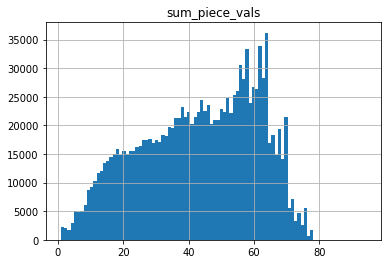

In [16]:
print(df.hist(column = 'sum_piece_vals', bins = 94))

In [17]:
print(df['sum_piece_vals'].value_counts().sort_index(ascending = False).to_string())

94        1
86        2
81        1
80        1
79        1
78     1684
77      726
76     5553
75     2648
74     4625
73     3257
72     7051
71     5516
70    21434
69    14104
68    19285
67    14862
66    18249
65    16936
64    36197
63    28229
62    33897
61    26442
60    26652
59    23913
58    33346
57    28167
56    30629
55    26034
54    25374
53    22180
52    24827
51    22302
50    22923
49    20889
48    20981
47    20293
46    23600
45    22563
44    24398
43    22288
42    21384
41    20270
40    22333
39    21470
38    23275
37    21281
36    21297
35    19585
34    19645
33    18088
32    18395
31    17094
30    17442
29    16886
28    17656
27    17376
26    17360
25    16445
24    16306
23    15521
22    15470
21    14953
20    15602
19    14906
18    15915
17    14923
16    14495
15    13808
14    13495
13    12064
12    11634
11    10288
10     9310
9      8739
8      6038
7      5026
6      4835
5      5019
4      2879
3      1799
2      2030
1      2225


In [18]:
df2 = df

In [19]:
df = df2

In [20]:
#Use this if you want the "#0"s and "#-0"s to be in the data, otherwise don't

# def to_numeric(sf_eval):
#     if sf_eval[0] == '#':
#         if sf_eval[1] == "-":
#             return 100
#         elif sf_eval[1] == "0":
#             return -100
#     return float(sf_eval)

# df = df[df.cp != 'None']
# df['cp'] = df.apply(lambda row: to_numeric(row['cp']), axis = 1)


df = df[df.cp != 'None']
df = df[(df['cp'] != "#0") & (df['cp'] != "#-0")]
print(df['cp'])
df['cp'] = pd.to_numeric(df['cp'])

1            -1.2
2           -1.85
3          -17.92
6            9.91
7           -0.55
            ...  
1296618       1.6
1296619    -11.79
1296620      5.06
1296621     -1.06
1296622      3.19
Name: cp, Length: 1125739, dtype: object


[[<AxesSubplot:title={'center':'cp'}>]]


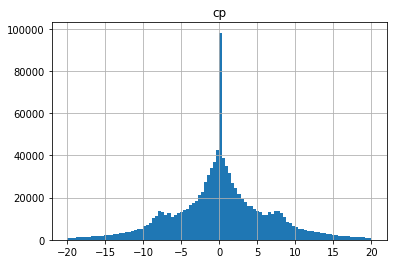

In [21]:
print(df.hist(column = 'cp', bins = 100, range = [-20, 20]))

[[<AxesSubplot:title={'center':'move_ply'}>]]


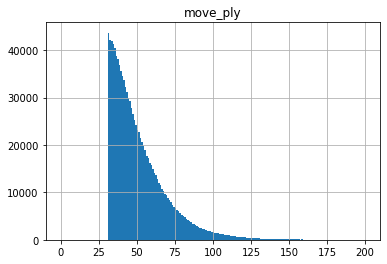

In [22]:
df['move_ply'] = df['move_ply'].astype(int)
print(df.hist(column = 'move_ply', bins = 200, range = [0, 200]))

In [23]:
df.groupby([pd.cut(df['cp'], np.arange(-10,12,2))]).count()

,game_id,type,result,white_player,black_player,white_elo,black_elo,time_control,num_ply,termination,...,num_legal_moves,opp_bishop_count,opp_knight_count,opp_pawn_count,opp_queen_count,opp_rook_count,elo_diff,white_piece_vals,black_piece_vals,sum_piece_vals
cp,,,,,,,,,,,,,,,,,,,,,
"(-10, -8]",43563,43563,43563,43563,43563,43563,43563,43563,43563,43563,...,43563,43563,43563,43563,43563,43563,43563,43563,43563,43563
"(-8, -6]",61960,61960,61960,61960,61960,61960,61960,61960,61960,61960,...,61960,61960,61960,61960,61960,61960,61960,61960,61960,61960
"(-6, -4]",66663,66663,66663,66663,66663,66663,66663,66663,66663,66663,...,66663,66663,66663,66663,66663,66663,66663,66663,66663,66663
"(-4, -2]",96468,96468,96468,96468,96468,96468,96468,96468,96468,96468,...,96468,96468,96468,96468,96468,96468,96468,96468,96468,96468
"(-2, 0]",224460,224460,224460,224460,224460,224460,224460,224460,224460,224460,...,224460,224460,224460,224460,224460,224460,224460,224460,224460,224460
"(0, 2]",177127,177127,177127,177127,177127,177127,177127,177127,177127,177127,...,177127,177127,177127,177127,177127,177127,177127,177127,177127,177127
"(2, 4]",98846,98846,98846,98846,98846,98846,98846,98846,98846,98846,...,98846,98846,98846,98846,98846,98846,98846,98846,98846,98846
"(4, 6]",68637,68637,68637,68637,68637,68637,68637,68637,68637,68637,...,68637,68637,68637,68637,68637,68637,68637,68637,68637,68637
"(6, 8]",64709,64709,64709,64709,64709,64709,64709,64709,64709,64709,...,64709,64709,64709,64709,64709,64709,64709,64709,64709,64709


In [24]:
# https://pypi.org/project/stockfish/
# https://acepoint.de/some-chess-stuff-for-apples-m1/
# code from https://stackoverflow.com/questions/58556338/python-evaluating-a-board-position-using-stockfish-from-the-python-chess-librar
import chess
import chess.engine
from chess.engine import *
def stockfish_evaluation(board, time_limit = 0.05, depth_searched = 100):
    engine = chess.engine.SimpleEngine.popen_uci("/Users/matthewho/Downloads/ChessEngineWork/maia-chess/stockfish-13")
    result = engine.analyse(board, chess.engine.Limit(time = time_limit, depth = depth_searched))
    engine.close()
    return result


board = chess.Board("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1")
pov_score = stockfish_evaluation(board)["score"]
# print(pov_score.wdl(ply = 20))
# if pov_score
# print(evaluation)
Cp(50).wdl(ply = 10)

Wdl(wins=109, draws=879, losses=12)

In [41]:
badfen = ""

In [118]:
def get_eval(movestring):
    if isinstance(movestring['Mate'], int):
        if movestring['Mate'] > 0:
            return 2000
        else:
            return -2000
    return movestring['Centipawn']

# can use Cp(evaluation).wdl().expectation() to have an alternative metric
def find_number_ok_moves(fen, diff_raw_cp = 100):
    stockfish.set_fen_position(fen)
    #the next line is really slow
    top_moves = stockfish.get_top_moves(20)
    best_move_eval = get_eval(top_moves[0])
    num_top_moves = len(top_moves)
    for i in range(num_top_moves):
        candidate_move_eval = get_eval(top_moves[i])
        if abs(best_move_eval - candidate_move_eval) >= diff_raw_cp and (min(abs(best_move_eval), abs(candidate_move_eval)) < 500 or best_move_eval * candidate_move_eval >= 0):
            return i
    return num_top_moves


In [125]:
def test_fn_speed(fen):
    for i in range(20):
        find_number_ok_moves(fen)
    return 0

In [127]:
%%time
test_fn_speed("r2q2k1/p4rPp/1pb1p3/8/3p4/P1NKbPN1/1PP3nP/R2Q3R w - - 0 20")

CPU times: user 18.8 ms, sys: 6.59 ms, total: 25.4 ms
Wall time: 14.8 s


0

In [126]:
import cProfile
import re
cProfile.run('test_fn_speed("r2q2k1/p4rPp/1pb1p3/8/3p4/P1NKbPN1/1PP3nP/R2Q3R w - - 0 20")')

         36064 function calls in 14.651 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       60    0.000    0.000    0.000    0.000 1863994553.py:1(get_eval)
       20    0.004    0.000   14.651    0.733 1863994553.py:10(find_number_ok_moves)
        1    0.000    0.000   14.651   14.651 3253127304.py:1(test_fn_speed)
        1    0.000    0.000   14.651   14.651 <string>:1(<module>)
      400    0.001    0.000    0.001    0.000 codecs.py:319(decode)
       20    0.000    0.000    0.000    0.000 models.py:102(_go)
       20    0.000    0.000    0.001    0.000 models.py:166(get_fen_position)
       20    0.000    0.000    0.007    0.000 models.py:206(set_fen_position)
       20    0.003    0.000   14.639    0.732 models.py:314(get_top_moves)
       20    0.000    0.000    0.007    0.000 models.py:75(_prepare_for_new_position)
      180    0.000    0.000    0.001    0.000 models.py:81(_put)
     6560    0.002    0.000   14.

In [102]:
from stockfish import Stockfish
stockfish_path = "/Users/matthewho/Downloads/ChessEngineWork/maia-chess/stockfish-13"

stockfish = Stockfish(stockfish_path)
# setting SF to depth 15 because the Maia paper said that depth 15 SF is best at predicting human moves
stockfish.set_depth(15)


In [103]:
df['number_of_reasonable_moves'] = df.apply(
    lambda row: find_number_ok_moves(row.loc['board']), axis = 1)

[{'Move': 'c3e2', 'Centipawn': -1264, 'Mate': None}, {'Move': 'c3d5', 'Centipawn': -1725, 'Mate': None}, {'Move': 'g3h5', 'Centipawn': -1726, 'Mate': None}, {'Move': 'a3a4', 'Centipawn': -2248, 'Mate': None}, {'Move': 'd1e2', 'Centipawn': None, 'Mate': -12}, {'Move': 'd1f1', 'Centipawn': None, 'Mate': -11}, {'Move': 'g3e2', 'Centipawn': None, 'Mate': -8}, {'Move': 'd3e2', 'Centipawn': None, 'Mate': -8}, {'Move': 'g3f5', 'Centipawn': None, 'Mate': -7}, {'Move': 'g3e4', 'Centipawn': None, 'Mate': -7}, {'Move': 'd1c1', 'Centipawn': None, 'Mate': -7}, {'Move': 'f3f4', 'Centipawn': None, 'Mate': -7}, {'Move': 'h2h4', 'Centipawn': None, 'Mate': -6}, {'Move': 'a1b1', 'Centipawn': None, 'Mate': -6}, {'Move': 'h1g1', 'Centipawn': None, 'Mate': -6}, {'Move': 'h2h3', 'Centipawn': None, 'Mate': -6}, {'Move': 'g3f1', 'Centipawn': None, 'Mate': -6}, {'Move': 'h1f1', 'Centipawn': None, 'Mate': -6}, {'Move': 'a1c1', 'Centipawn': None, 'Mate': -6}, {'Move': 'a1a2', 'Centipawn': None, 'Mate': -6}]
r2q2k

TypeError: bad operand type for abs(): 'NoneType'

In [ ]:
df['number_of_reasonable_moves']

In [89]:
df['board'][2]

'8/6b1/3pq1k1/2p3pp/1p1p1p2/1P1PrP1P/P5P1/2Q1RBK1 w - - 2 38'

In [54]:
stockfish.set_fen_position("6k1/1b3pp1/p6p/1P1p2q1/P2P4/1QP4P/4rPP1/5RK1 w - - 1 28")

In [55]:
stockfish.get_top_moves(20)

[{'Move': 'b5b6', 'Centipawn': -268, 'Mate': None},
 {'Move': 'b3b1', 'Centipawn': -276, 'Mate': None},
 {'Move': 'a4a5', 'Centipawn': -300, 'Mate': None},
 {'Move': 'g1h1', 'Centipawn': -303, 'Mate': None},
 {'Move': 'g1h2', 'Centipawn': -310, 'Mate': None},
 {'Move': 'b3b4', 'Centipawn': -361, 'Mate': None},
 {'Move': 'b3a3', 'Centipawn': -367, 'Mate': None},
 {'Move': 'b3d1', 'Centipawn': -371, 'Mate': None},
 {'Move': 'h3h4', 'Centipawn': -372, 'Mate': None},
 {'Move': 'f1d1', 'Centipawn': -374, 'Mate': None},
 {'Move': 'g2g3', 'Centipawn': -382, 'Mate': None},
 {'Move': 'f1b1', 'Centipawn': -428, 'Mate': None},
 {'Move': 'f1a1', 'Centipawn': -436, 'Mate': None},
 {'Move': 'b5a6', 'Centipawn': -489, 'Mate': None},
 {'Move': 'g2g4', 'Centipawn': -566, 'Mate': None},
 {'Move': 'c3c4', 'Centipawn': -1056, 'Mate': None},
 {'Move': 'b3c2', 'Centipawn': -1205, 'Mate': None},
 {'Move': 'b3b2', 'Centipawn': -1209, 'Mate': None},
 {'Move': 'b3a2', 'Centipawn': -1240, 'Mate': None},
 {'Move'

In [57]:
Cp(-268).wdl().expectation()-Cp(-1240).wdl().expectation()

0.011

In [59]:
Cp(250).wdl().expectation()

0.9825

In [60]:
Cp(100).wdl().expectation()

0.66

In [131]:
%%time
board = chess.Board("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1")

PovScore(Cp(+17), WHITE)
CPU times: user 6.69 ms, sys: 16.4 ms, total: 23.1 ms
Wall time: 220 ms


In [133]:
# Idea: instead of running SF for every row in the table, select randomly and sample, because SF 
# is too slow to do the whole table without parallelizing

import cProfile
import re
cProfile.run('pov_score = stockfish_evaluation(board)["score"]')

         120 function calls in 0.219 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.218    0.218 858546784.py:7(stockfish_evaluation)
        1    0.000    0.000    0.218    0.218 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:2(__init__)
        2    0.000    0.000    0.000    0.000 _base.py:317(__init__)
        2    0.000    0.000    0.000    0.000 _base.py:387(__get_result)
        2    0.000    0.000    0.217    0.109 _base.py:417(result)
        1    0.000    0.000    0.000    0.000 _weakrefset.py:39(_remove)
        1    0.000    0.000    0.000    0.000 _weakrefset.py:86(add)
        2    0.000    0.000    0.000    0.000 base_events.py:1908(get_debug)
        2    0.000    0.000    0.000    0.000 base_events.py:508(_check_closed)
        2    0.000    0.000    0.000    0.000 base_events.py:765(_call_soon)
        2    0.000    0.000    0.000    0.000 base